<a href="https://colab.research.google.com/github/FranklineMisango/Data_Structures_-_Algorithms_Python/blob/main/HashMap_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement - Python Dictionaries and Hash Tables
In this assignment, you will recreate Python dictionaries from scratch using data structure called hash table. Dictionaries in Python are used to store key-value pairs. Keys are used to store and retrieve values. For example, here's a dictionary for storing and retrieving phone numbers using people's names.

In [1]:
#solved with a problem statement 
phone_numbers = {
  'Aakash' : '9489484949',
  'Hemanth' : '9595949494',
  'Siddhant' : '9231325312'
}
phone_numbers

{'Aakash': '9489484949', 'Hemanth': '9595949494', 'Siddhant': '9231325312'}

In [4]:
#Accessing the dictionary keys
phone_numbers['Aakash']


'9489484949'

In [5]:
# Add a new value
phone_numbers['Vishal'] = '8787878787'
# Update existing value
phone_numbers['Aakash'] = '7878787878'
# View the updated dictionary
phone_numbers

{'Aakash': '7878787878',
 'Hemanth': '9595949494',
 'Siddhant': '9231325312',
 'Vishal': '8787878787'}

In [6]:
#Viewing using a for loop

for name in phone_numbers:
    print('Name:', name, ', Phone Number:', phone_numbers[name])

Name: Aakash , Phone Number: 7878787878
Name: Hemanth , Phone Number: 9595949494
Name: Siddhant , Phone Number: 9231325312
Name: Vishal , Phone Number: 8787878787


Dictionaries in Python are implemented using a data structure called hash table. A hash table uses a list/array to store the key-value pairs, and uses a hashing function to determine the index for storing or retrieving the data associated with a given key.

Here's a visual representation of a hash table (source):

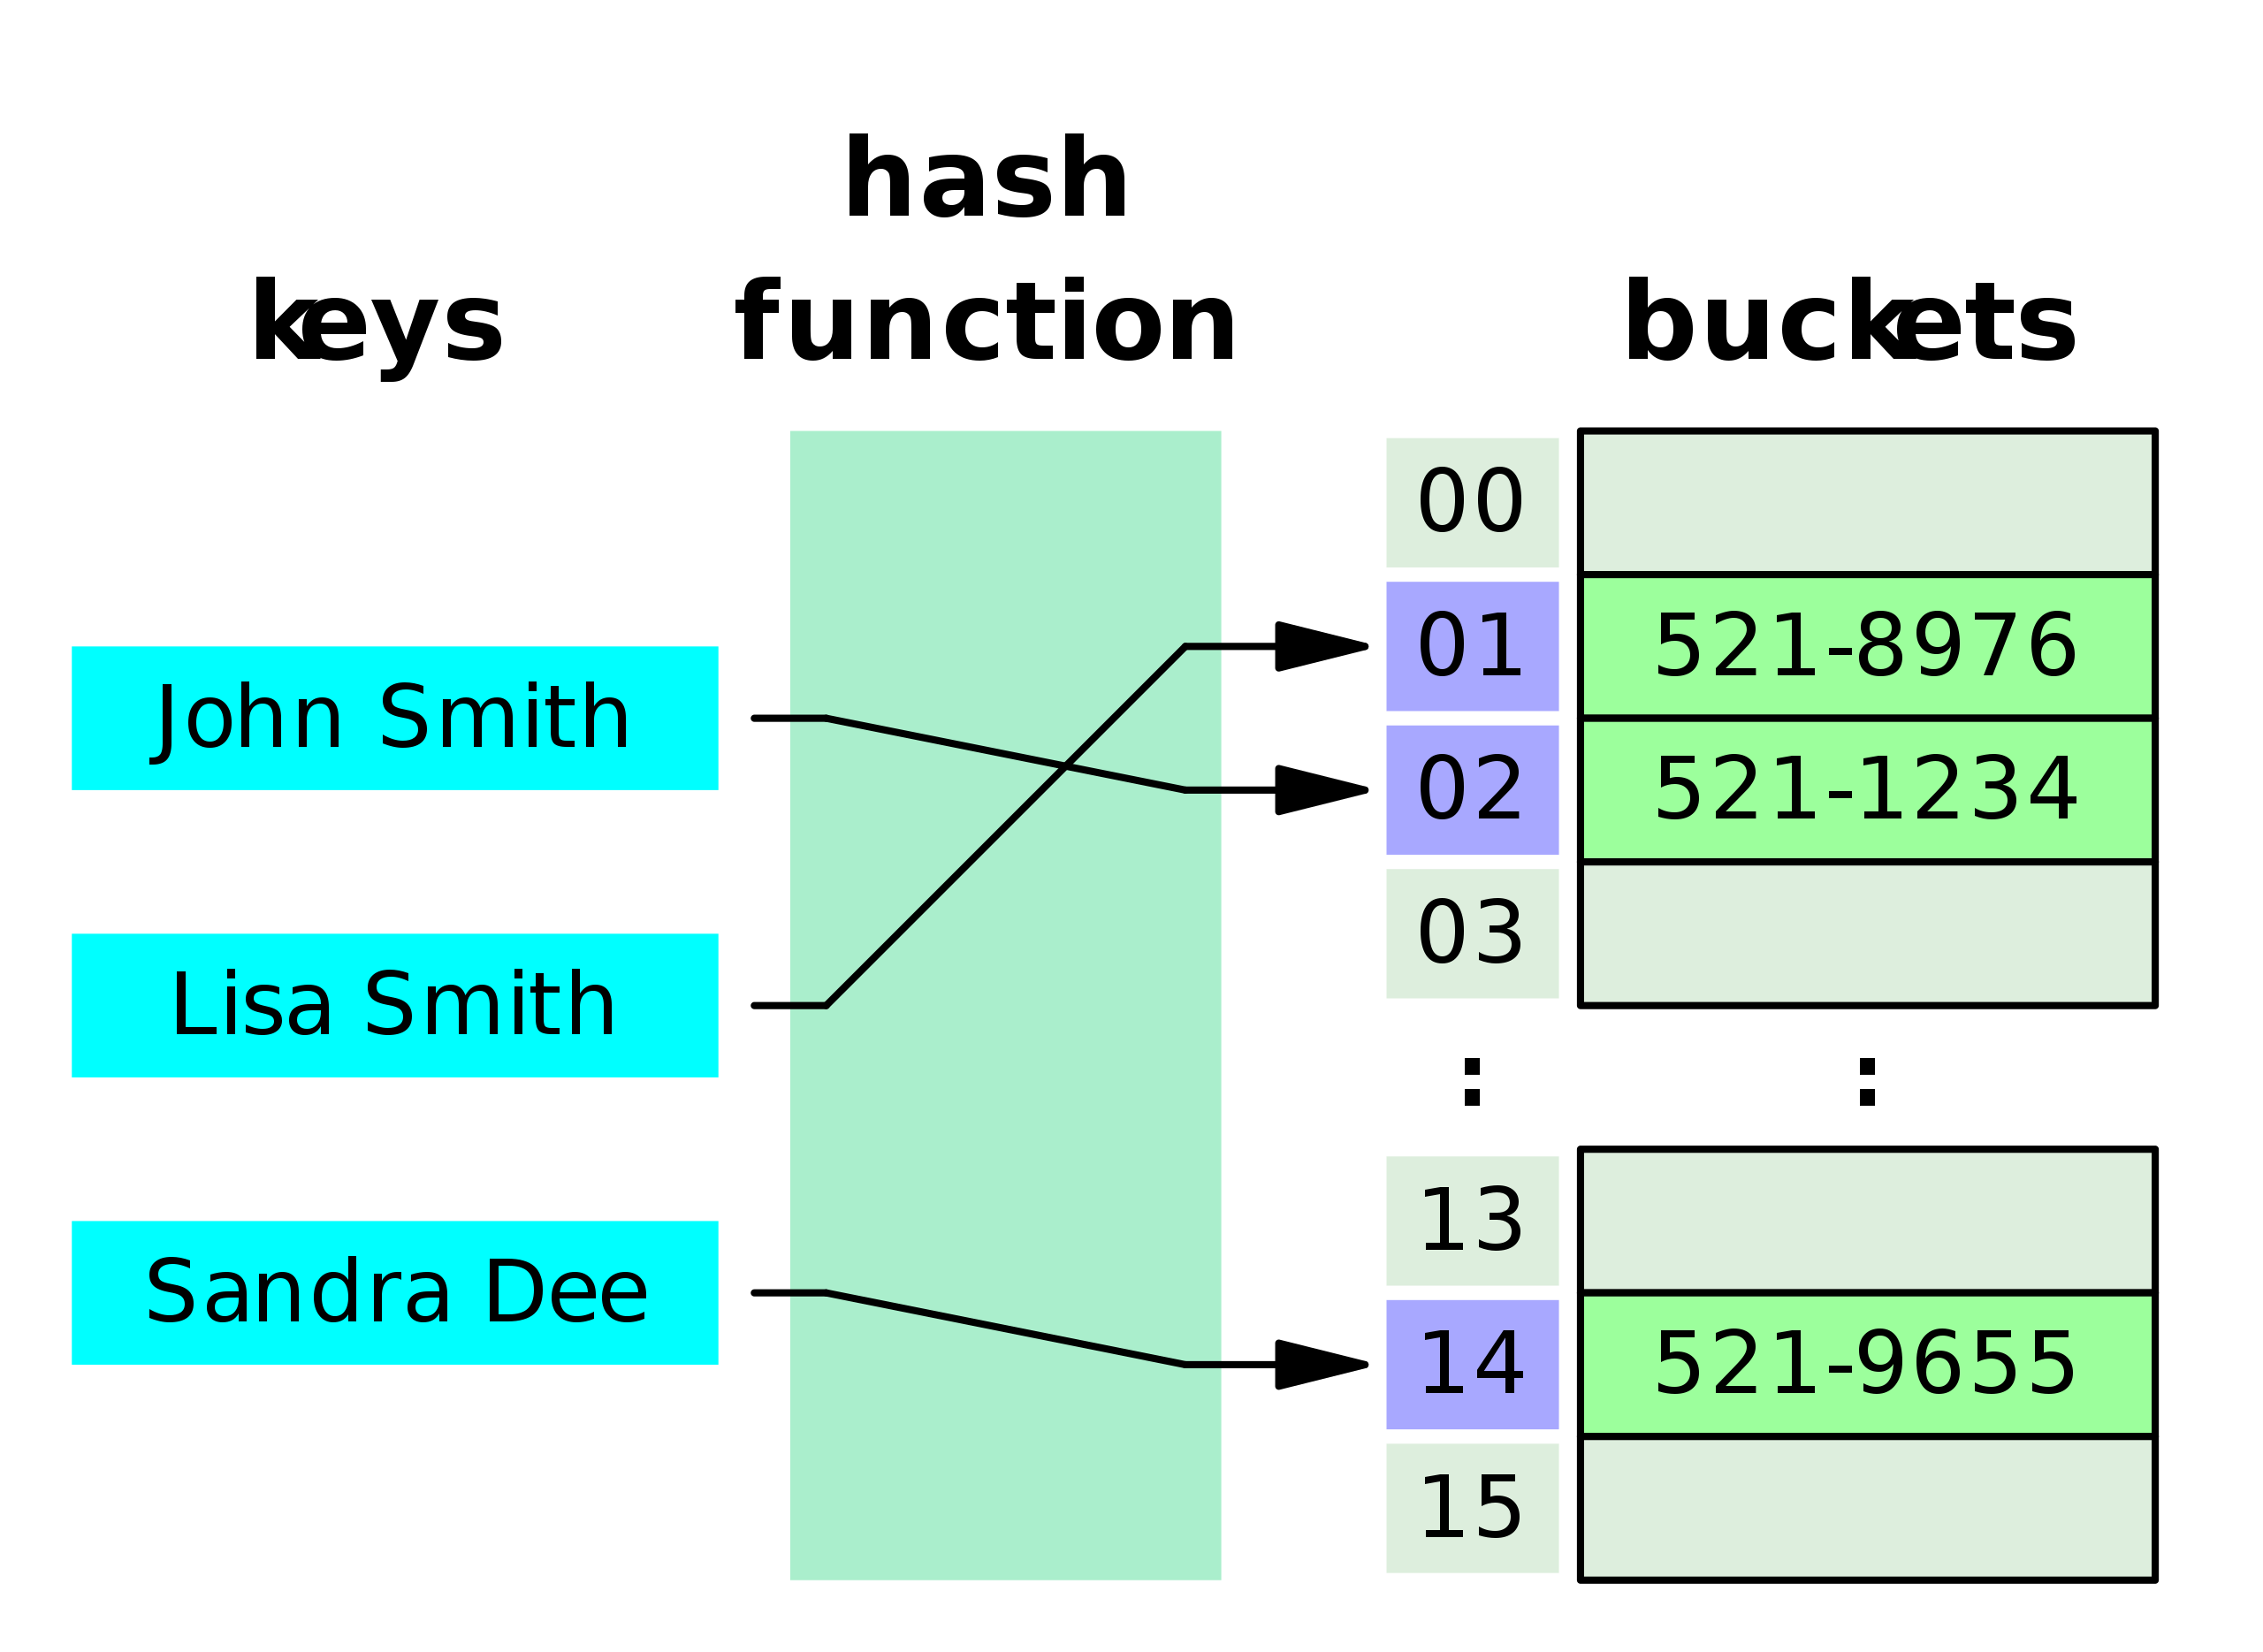


Your objective in this assignment is to implement a HashTable class which supports the following operations:

Insert: Insert a new key-value pair
Find: Find the value associated with a key
Update: Update the value associated with a key
List: List all the keys stored in the hash table
The HashTable class will have the following structure (note the function signatures):



In [ ]:
#Blue print of a hash table

class HashTable:
    def insert(self, key, value):
        """Insert a new key-value pair"""
        pass
    
    def find(self, key):
        """Find the value associated with a key"""
        pass
    
    def update(self, key, value):
        """Change the value associated with a key"""
        pass
    
    def list_all(self):
        """List all the keys"""
        pass

In [8]:
#Creating a Data List

MAX_HASH_TABLE_SIZE = 4096


QUESTION 1: Create a Python list of size MAX_HASH_TABLE_SIZE, with all the values set to None.

Hint: Use the * operator.

In [17]:
data_list = [None]* 4096
data_list[99] == None  #True
print(data_list[99])


None


In [13]:
len(data_list) == 4096 #True


True

Hashing Function
A hashing function is used to convert strings and other non-numeric data types into numbers, which can then be used as list indices. For instance, if a hashing function converts the string "Aakash" into the number 4, then the key-value pair ('Aakash', '7878787878') will be stored at the position 4 within the data list.

Here's a simple algorithm for hashing, which can convert strings into numeric list indices.

1. Iterate over the string, character by character
2. Convert each character to a number using Python's built-in ord function.
3. Add the numbers for each character to obtain the hash for the entire string
4. Take the remainder of the result with the size of the data list


QUESTION 2: Complete the get_index function below which implements the hashing algorithm described above.

In [14]:
def get_index(data_list, a_string):
    # Variable to store the result (updated after each iteration)
    result = 0
    
    for a_character in a_string:
        # Convert the character to a number (using ord)
        a_number = ord(a_character)
        # Update result by adding the number
        result += a_number
    
    # Take the remainder of the result with the size of the data list
    list_index = result % len(data_list)
    return list_index

In [18]:
#Testing the get index function
#All true

get_index(data_list, '') == 0
get_index(data_list, 'Aakash') == 585
get_index(data_list, 'Don O Leary') == 941


True

In [20]:
#Test B by curating a new data list
data_list2 = [None] * 48
get_index(data_list2 , 'Aakash')
get_index(data_list2, 'Don O Leary')

29

In [23]:
#To insert a key-value pair into a hash table, we can simply get the hash of the key, and store the pair at that index in the data list.
key, value = 'Aakash', '7878787878'
idx = get_index(data_list, key)
data_list[idx] = (key, value)
data_list[get_index(data_list, 'Hemanth')] = ('Hemanth', '9595949494') #One liner to insert Hemanth

In [24]:
#Find
#The retrieve the value associated with a pair, we can get the hash of the key and look up that index in the data list.

idx = get_index(data_list, 'Aakash')
key, value = data_list[idx]
value

'7878787878'

In [27]:
#List
keys = [kv[0] for kv in data_list if kv is not None] #Prints the values we just added at the top
keys

['Aakash', 'Hemanth']

In [29]:
# Basic hashmap Implementation
class BasicHashTable:
    def __init__(self, max_size = MAX_HASH_TABLE_SIZE):
        # 1. Create a list of size `max_size` with all values None
        self.data_list = [None] * max_size
     
    
    def insert(self, key, value):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list, key)
        
        # 2. Store the key-value pair at the right index
        self.data_list[idx] = key , value 
    
    
    def find(self, key):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list , key)

        # 2. Retrieve the data stored at the index
        kv = self.data_list[idx]
        
        # 3. Return the value if found, else return None
        if kv is None:
            return None
        else:
            key, value = kv
            return value
    
    
    def update(self, key, value):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list , key)
        
        # 2. Store the new key-value pair at the right index
        self.data_list[idx] = key, value

    
    def list_all(self):
        # 1. Extract the key from each key-value pair 
        return [kv [0] for kv in self.data_list if kv is not None]


In [30]:
#Creating a basic Hash Table
basic_table = BasicHashTable(max_size=1024)
len(basic_table.data_list) == 1024

True

In [31]:
# Insert some values
basic_table.insert('Aakash', '9999999999')
basic_table.insert('Hemanth', '8888888888')

# Find a value
basic_table.find('Hemanth') == '8888888888'


True

In [32]:
# Update a value
basic_table.update('Aakash', '7777777777')

# Check the updated value
basic_table.find('Aakash') == '7777777777'

True

In [33]:
# Get the list of keys
basic_table.list_all() == ['Aakash', 'Hemanth']

True

Handling Collisions with Linear Probing
As you might have wondered, multiple keys can have the same hash. For instance, the keys "listen" and "silent" have the same hash. This is referred to as collision. Data stored against one key may override the data stored against another, if they have the same hash

In [35]:
#The two words have the same index hence the second one replaces the value of the first one
basic_table.insert('listen', 99)
basic_table.insert('silent', 200)
basic_table.find('listen')


200

In [37]:
class ProbingHashTable:
    def __init__(self, max_size=MAX_HASH_TABLE_SIZE):
        # 1. Create a list of size `max_size` with all values None
        self.data_list = ???
     
    
    def insert(self, key, value):
        # 1. Find the index for the key using get_valid_index
        idx = get_valid_index(self.data_list, ???)
        
        # 2. Store the key-value pair at the right index
        self.data_list[idx] = ???
    
    
    def find(self, key):
        # 1. Find the index for the key using get_valid_index
        idx = ???
        
        # 2. Retrieve the data stored at the index
        kv = ???
        
        # 3. Return the value if found, else return None
        return None if kv is None else kv[1]
    
    
    def update(self, key, value):
        # 1. Find the index for the key using get_valid_index
        idx = ???
        
        # 2. Store the new key-value pair at the right index
        self.data_list[idx] = ???

    
    def list_all(self):
        # 1. Extract the key from each key-value pair 
        return [??? for kv in self.data_list if kv is not None]

SyntaxError: ignored

In [36]:
# Create a new hash table
probing_table = ProbingHashTable()

# Insert a value
probing_table.insert('listen', 99)

# Check the value
probing_table.find('listen') == 99

NameError: ignored

In [ ]:
# Insert a colliding key
probing_table.insert('silent', 200)

# Check the new and old keys
probing_table.find('listen') == 99 and probing_table.find('silent') == 200

In [ ]:
# Update a key
probing_table.insert('listen', 101)

# Check the value
probing_table.find('listen') == 101

In [ ]:
probing_table.list_all() == ['listen', 'silent']